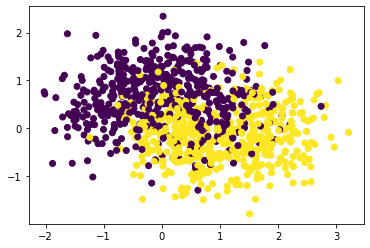

In [4]:
"""
Grid Search + RandomFrost
"""

from sklearn.datasets import make_moons # 초승달 모양이 두 클러스터 데이터 셋을 만들어주는 ㄷ함수
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt


# 1. dataset 생성
moons = make_moons(n_samples=1000, noise=0.5,random_state = 0)# noise를 높게하면 분류가 어려워진다
X,y = make_moons(n_samples=1000, noise=0.5,random_state = 0)# noise에 따라 ..?
X.shape #(1000, 2) 2차원
y.shape #(1000,) 1차원

plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.show()

In [5]:
# dataset split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [6]:
# 2. RF default model
'''
n_estimator : 결정 트리 개수(default=10), 많을 수록 성능이 좋아짐 
max_features : x변수를 참조하는 개수(default='auto')
max_depth : 트리의 깊이(클 수록 서능이 좋아짐, 오버피팅 문제) - 가지치기 
min_sample_leaf : leaf node가 되기 위한 최소한의 sample 수 
min_sample_split : node 분할을 위한 최소한의 sample 수 
'''

rfc = RandomForestClassifier(random_state=0) # model 생성 
model = rfc.fit(X_train, y_train)
model # default parameter

y_pred = model.predict(X_test)
print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.7825


In [8]:
# 3. HyperParameter 설정 
'''
n_estimator=10 : 결정 트리 개수, 많을 수록 성능이 좋아짐 
max_features='auto' : x변수를 참조하는 개수
 - 분류 : max_features=sqrt(n_features), 회귀 : max_features=n_features
max_depth=3 : 트리의 깊이(클 수록 서능이 좋아짐, 오버피팅 문제)
min_sample_leaf=3 : leaf node가 되기 위한 최소한의 sample 수(terminal 노드 수) 
min_sample_split=2 : 내부 노드를 분할하는 데 필요한 최소 sample 수(자식 노드 수)  
'''

params = {'n_estimators':[100,200,300,400],
             'max_depth':[3,6,8,10],
             'min_samples_leaf':[3,5,7,10],
             'min_samples_split':[2,3,4,5]} # dict 정의

# 4. GridSearch model 
rf_grid = GridSearchCV(model, param_grid = params, 
                       scoring='accuracy', cv=5, n_jobs=-1)

grid_model=rf_grid.fit(X_train, y_train)

In [10]:
# 4. Bast HyperParameter
print('best score =', grid_model.best_score_)
print('best params =', grid_model.best_params_)

best score = 0.8433333333333334
best params = {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400}
